In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


In [ ]:
IMG_SIZE = 128
# DATA_PATH = "dataset/pseudoRGB_dataset/"
CLASSES = os.listdir(DATA_PATH)

def load_images(path):
    images = []
    labels = []
    for idx, label in enumerate(CLASSES):
        class_path = os.path.join(path, label)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(idx)
    return np.array(images), np.array(labels)

X, y = load_images(DATA_PATH)
X = X / 255.0  # Normalize
y_cat = to_categorical(y)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\sreec\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,836 (28.20 MB)

 Trainable params: 7,392,836 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 79s 441ms/step - accuracy: 0.3492 - loss: 1.4858 - val_accuracy: 0.5922 - val_loss: 0.9107
Epoch 2/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 68s 424ms/step - accuracy: 0.6132 - loss: 0.8628 - val_accuracy: 0.6328 - val_loss: 0.8051
Epoch 3/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 381ms/step - accuracy: 0.7109 - loss: 0.6686 - val_accuracy: 0.6781 - val_loss: 0.7114
Epoch 4/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 74s 464ms/step - accuracy: 0.7720 - loss: 0.5489 - val_accuracy: 0.7094 - val_loss: 0.6919
Epoch 5/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 53s 282ms/step - accuracy: 0.8300 - loss: 0.4108 - val_accuracy: 0.7539 - val_loss: 0.6343
Epoch 6/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 353ms/step - accuracy: 0.8827 - loss: 0.3085 - val_accuracy: 0.7570 - val_loss: 0.6391
Epoch 7/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 46s 289ms/step - accuracy: 0.9084 - loss: 0.2539 - val_accuracy: 0.7500 - val_loss: 0.7099
Epoch 8/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 343ms/step - accuracy: 0.9255 - loss: 0

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=CLASSES))


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.7587 - loss: 0.7017
Test Accuracy: 0.7587500214576721
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step
                  precision    recall  f1-score   support

    MildDemented       0.72      0.80      0.76       400
ModerateDemented       0.91      0.96      0.94       400
     NonDemented       0.79      0.65      0.71       400
VeryMildDemented       0.61      0.63      0.62       400

        accuracy                           0.76      1600
       macro avg       0.76      0.76      0.76      1600
    weighted avg       0.76      0.76      0.76      1600



c:\Users\sreec\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


  1%|          | 10/1000 [00:00<00:41, 23.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  2%|▏         | 20/1000 [00:00<00:29, 33.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  3%|▎         | 30/1000 [00:00<00:25, 38.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 40/1000 [00:01<00:22, 42.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▌         | 50/1000 [00:01<00:21, 44.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▌         | 60/1000 [00:01<00:20, 46.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 70/1000 [00:01<00:19, 48.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 80/1000 [00:01<00:18, 48.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  9%|▉         | 90/1000 [00:02<00:20, 45.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|█         | 100/1000 [00:02<00:19, 46.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 11%|█         | 110/1000 [00:02<00:23, 38.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 120/1000 [00:02<00:21, 40.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 130/1000 [00:03<00:20, 42.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▍        | 140/1000 [00:03<00:19, 43.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 150/1000 [00:03<00:19, 44.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 16%|█▌        | 160/1000 [00:03<00:18, 44.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 17%|█▋        | 170/1000 [00:03<00:18, 45.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 18%|█▊        | 180/1000 [00:04<00:27, 30.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 19%|█▉        | 190/1000 [00:04<00:26, 30.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 20%|██        | 200/1000 [00:05<00:25, 31.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 21%|██        | 210/1000 [00:05<00:23, 33.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 22%|██▏       | 220/1000 [00:05<00:24, 31.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 23%|██▎       | 230/1000 [00:06<00:25, 30.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 24%|██▍       | 240/1000 [00:06<00:25, 30.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 25%|██▌       | 250/1000 [00:06<00:26, 28.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 26%|██▌       | 260/1000 [00:07<00:36, 20.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 27%|██▋       | 270/1000 [00:08<00:46, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 28%|██▊       | 280/1000 [00:09<00:51, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 29%|██▉       | 290/1000 [00:09<00:42, 16.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 30%|███       | 300/1000 [00:10<00:35, 19.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 31%|███       | 310/1000 [00:10<00:29, 23.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 32%|███▏      | 320/1000 [00:10<00:28, 24.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 33%|███▎      | 330/1000 [00:11<00:33, 20.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 34%|███▍      | 340/1000 [00:11<00:29, 22.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 35%|███▌      | 350/1000 [00:12<00:25, 25.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 360/1000 [00:12<00:21, 29.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 370/1000 [00:12<00:18, 34.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 380/1000 [00:12<00:15, 39.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 390/1000 [00:12<00:14, 42.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 40%|████      | 400/1000 [00:13<00:21, 27.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 41%|████      | 410/1000 [00:14<00:31, 18.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 420/1000 [00:14<00:27, 20.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 43%|████▎     | 430/1000 [00:15<00:25, 22.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 44%|████▍     | 440/1000 [00:15<00:24, 22.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 45%|████▌     | 450/1000 [00:15<00:21, 25.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 46%|████▌     | 460/1000 [00:16<00:24, 22.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 470/1000 [00:16<00:20, 25.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 48%|████▊     | 480/1000 [00:17<00:19, 26.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 49%|████▉     | 490/1000 [00:17<00:23, 21.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 50%|█████     | 500/1000 [00:17<00:20, 24.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 51%|█████     | 510/1000 [00:18<00:19, 25.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 52%|█████▏    | 520/1000 [00:18<00:17, 27.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 53%|█████▎    | 530/1000 [00:19<00:22, 20.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 54%|█████▍    | 540/1000 [00:19<00:21, 21.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 55%|█████▌    | 550/1000 [00:20<00:18, 24.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 56%|█████▌    | 560/1000 [00:20<00:15, 27.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 57%|█████▋    | 570/1000 [00:20<00:13, 32.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 58%|█████▊    | 580/1000 [00:20<00:12, 34.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 59%|█████▉    | 590/1000 [00:21<00:12, 33.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 60%|██████    | 600/1000 [00:21<00:12, 32.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 61%|██████    | 610/1000 [00:21<00:11, 34.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 62%|██████▏   | 620/1000 [00:21<00:10, 37.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 63%|██████▎   | 630/1000 [00:22<00:11, 31.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 64%|██████▍   | 640/1000 [00:22<00:10, 33.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 65%|██████▌   | 650/1000 [00:22<00:09, 36.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 66%|██████▌   | 660/1000 [00:22<00:08, 39.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 67%|██████▋   | 670/1000 [00:23<00:07, 42.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 68%|██████▊   | 680/1000 [00:23<00:07, 43.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|██████▉   | 690/1000 [00:23<00:07, 44.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 70%|███████   | 700/1000 [00:24<00:08, 35.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 71%|███████   | 710/1000 [00:24<00:10, 28.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 72%|███████▏  | 720/1000 [00:24<00:09, 30.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 73%|███████▎  | 730/1000 [00:25<00:08, 33.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 74%|███████▍  | 740/1000 [00:25<00:07, 35.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 75%|███████▌  | 750/1000 [00:25<00:07, 33.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 76%|███████▌  | 760/1000 [00:25<00:06, 36.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 77%|███████▋  | 770/1000 [00:26<00:06, 37.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 78%|███████▊  | 780/1000 [00:26<00:05, 36.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 79%|███████▉  | 790/1000 [00:26<00:05, 35.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 80%|████████  | 800/1000 [00:26<00:05, 37.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 81%|████████  | 810/1000 [00:27<00:04, 38.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 82%|████████▏ | 820/1000 [00:27<00:04, 41.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 83%|████████▎ | 830/1000 [00:27<00:04, 41.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 84%|████████▍ | 840/1000 [00:27<00:03, 42.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 85%|████████▌ | 850/1000 [00:28<00:03, 43.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 86%|████████▌ | 860/1000 [00:28<00:03, 44.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 87%|████████▋ | 870/1000 [00:28<00:02, 43.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 88%|████████▊ | 880/1000 [00:28<00:03, 39.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 89%|████████▉ | 890/1000 [00:29<00:02, 41.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 90%|█████████ | 900/1000 [00:29<00:02, 40.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 91%|█████████ | 910/1000 [00:29<00:02, 40.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 92%|█████████▏| 920/1000 [00:29<00:01, 40.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 93%|█████████▎| 930/1000 [00:29<00:01, 41.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 94%|█████████▍| 940/1000 [00:30<00:01, 42.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 95%|█████████▌| 950/1000 [00:30<00:01, 40.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 96%|█████████▌| 960/1000 [00:30<00:01, 39.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 97%|█████████▋| 970/1000 [00:31<00:00, 39.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 98%|█████████▊| 980/1000 [00:31<00:00, 39.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 99%|█████████▉| 990/1000 [00:31<00:00, 38.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


100%|██████████| 1000/1000 [00:31<00:00, 31.49it/s]


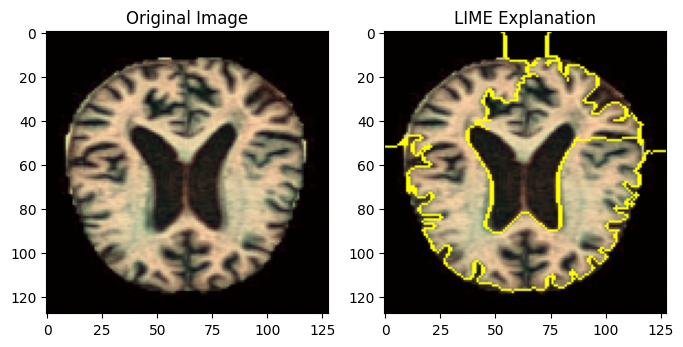

In [8]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

def explain_prediction(index):
    explanation = explainer.explain_instance(
        X_test[index].astype('double'),
        model.predict,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
    )

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(X_test[index])

    plt.subplot(1, 2, 2)
    plt.title("LIME Explanation")
    plt.imshow(mark_boundaries(temp, mask))
    plt.show()

# Try explaining the first test image
explain_prediction(0)


In [9]:
model.save("alzheimers_cnn_model.h5")
